In [71]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [72]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day (1).csv


In [ ]:
BoomBikesdf = pd.read_csv("day.csv")

In [73]:
# Read the given CSV file, and view some sample records

BoomBikesdf = pd.read_csv("day.csv")
BoomBikesdf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
# Understanding and Checking the DataFrame.

In [75]:
BoomBikesdf.shape

(730, 16)

In [76]:
BoomBikesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [77]:
BoomBikesdf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [78]:
# As Cnt column has sum of Casual and Registered. We can drop these two columns.
# Beacause instant column is record index and for dteday column we have year and month column, we will drop these column too.

BoomBikesdf.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

In [79]:
# View some sample records again after dropping

BoomBikesdf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [80]:
# Renaming some columns for better understanding

BoomBikesdf.rename(columns = {'yr':'year', 'mnth':'month','hum':'humidity'}, inplace = True)

In [81]:
# View some sample records again after renaming

BoomBikesdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [82]:
# dropping the duplicates

BoomBikesdf.drop_duplicates(inplace=True)

In [83]:
# Mapping the season column

BoomBikesdf.season = BoomBikesdf.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [84]:
# Mapping the month column

BoomBikesdf.month = BoomBikesdf.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [85]:
# Mapping the weekday column

BoomBikesdf.weekday = BoomBikesdf.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [86]:
# Mapping the weathersit column

BoomBikesdf.weathersit = BoomBikesdf.weathersit.map({1:'Clear',2:'Mist+Cloudy',3:'Light_snow',4:'Heavy_rain'})

In [87]:
# View some sample records again after mapping

BoomBikesdf.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [88]:
# Check Info after renaming categorical columns

BoomBikesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


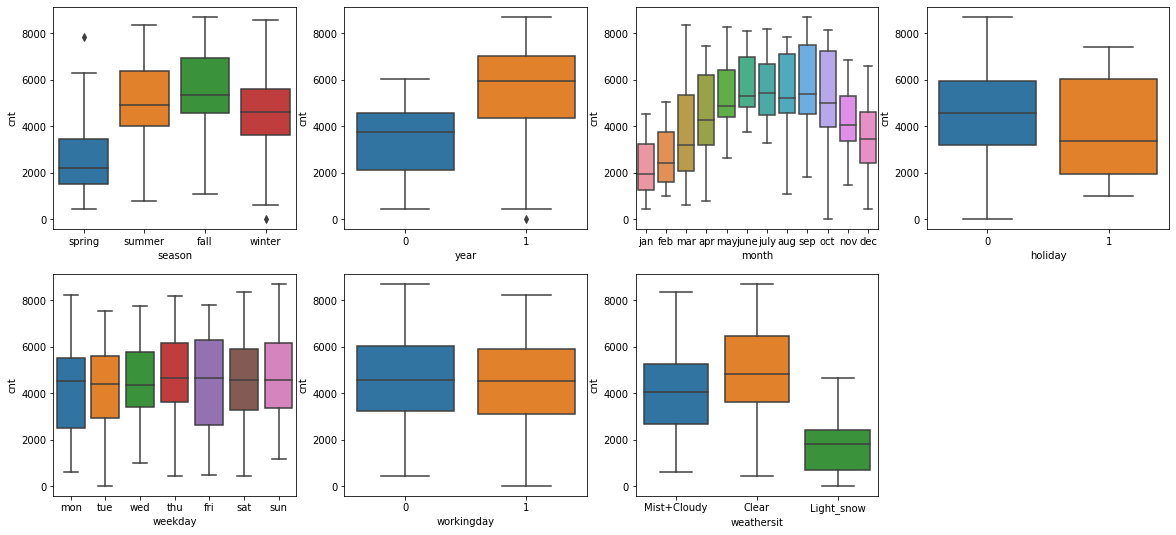

In [89]:
# Visualising Categorical Variables

plt.figure(figsize=(20, 9))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BoomBikesdf)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BoomBikesdf)

plt.show()

In [90]:
# Creating Dummy Variables

seasonsdf=pd.get_dummies(BoomBikesdf.season,drop_first=True)
monthsdf=pd.get_dummies(BoomBikesdf.month,drop_first=True)
weekdaysdf=pd.get_dummies(BoomBikesdf.weekday,drop_first=True)
weathersitdf=pd.get_dummies(BoomBikesdf.weathersit,drop_first=True)


In [91]:
# Merging the main dataframe, with the dummy variables dataframe. 

BoomBikesdf_new = pd.concat([BoomBikesdf,seasonsdf,monthsdf,weekdaysdf,weathersitdf,],axis=1)

In [92]:
# View some sample records again after merging with dummy variables dataframe

BoomBikesdf_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
0,spring,0,jan,0,mon,1,Mist+Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,Mist+Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Check Info after merging with dummy variables dataframe

BoomBikesdf_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   holiday      730 non-null    int64  
 4   weekday      730 non-null    object 
 5   workingday   730 non-null    int64  
 6   weathersit   730 non-null    object 
 7   temp         730 non-null    float64
 8   atemp        730 non-null    float64
 9   humidity     730 non-null    float64
 10  windspeed    730 non-null    float64
 11  cnt          730 non-null    int64  
 12  spring       730 non-null    uint8  
 13  summer       730 non-null    uint8  
 14  winter       730 non-null    uint8  
 15  aug          730 non-null    uint8  
 16  dec          730 non-null    uint8  
 17  feb          730 non-null    uint8  
 18  jan          730 non-null    uint8  
 19  july    

In [94]:
# Dropping some categorical columns as we have already created dummy variables for those columns.

BoomBikesdf_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [95]:
# View some sample records again after dropping columns whose dummy variables is created.

BoomBikesdf_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Splitting the Data into Training and Testing Sets

np.random.seed(0) # Specifing this so that the train and test data set always have the same rows, respectively
BoomBikesdf_new_train, BoomBikesdf_new_test = train_test_split(BoomBikesdf_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [97]:
# check the shape of training and testing datatset

print(BoomBikesdf_new_train.shape)
print(BoomBikesdf_new_test.shape)

(510, 30)
(219, 30)


In [98]:
# Rescaling the Features

scaler = MinMaxScaler()

In [99]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

BoomBikesdf_new_train[num_vars] = scaler.fit_transform(BoomBikesdf_new_train[num_vars])

In [100]:
# View some sample records again after rescaling the features.

BoomBikesdf_new_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [101]:
# describing the dataframe after rescaling the features.

BoomBikesdf_new_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


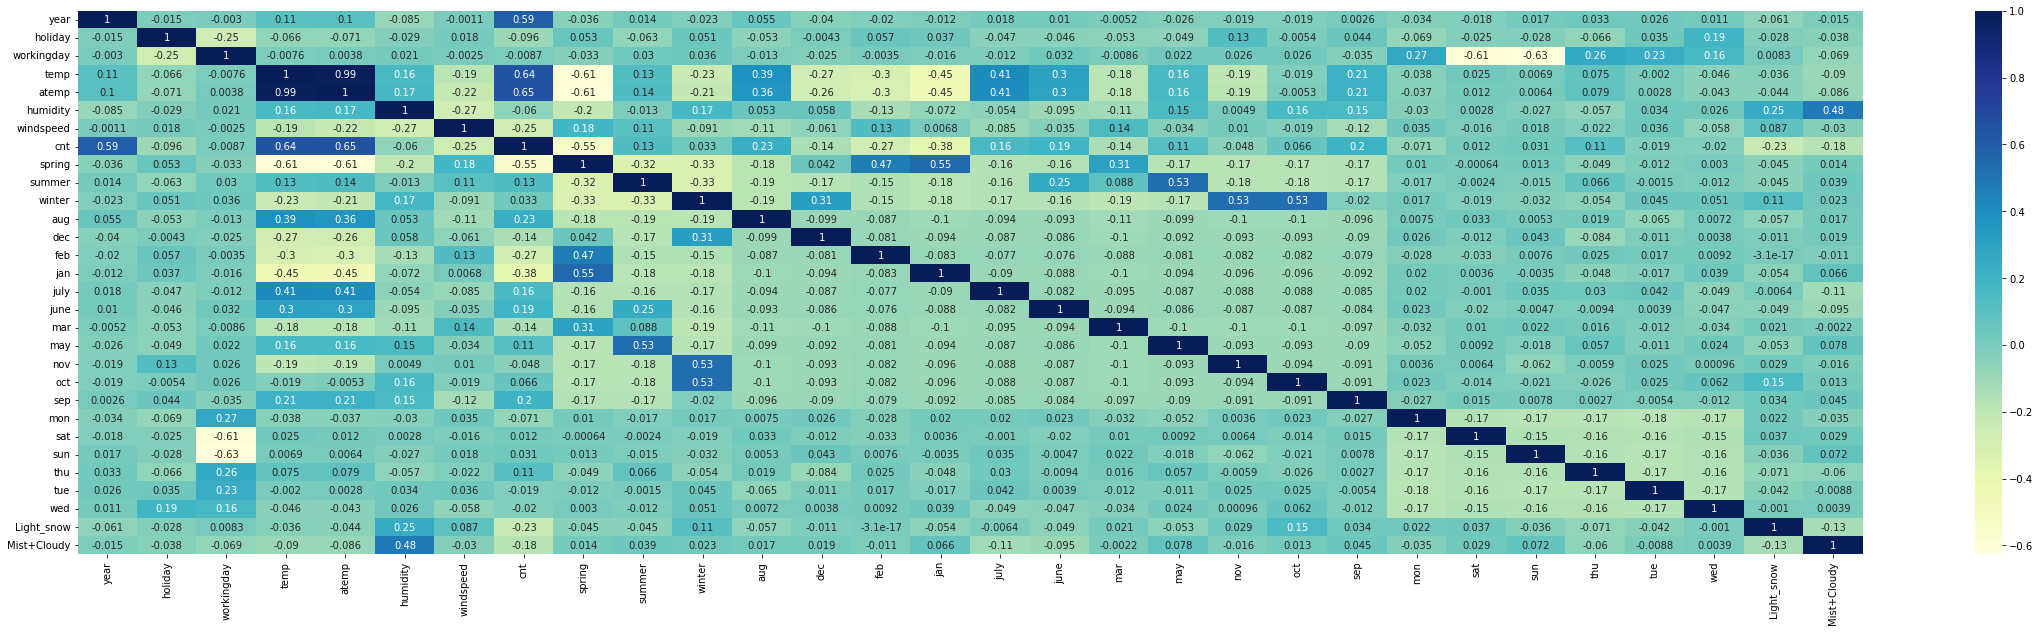

In [102]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 10))
sns.heatmap(BoomBikesdf_new_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

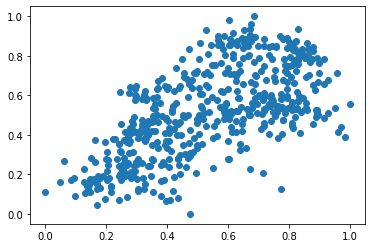

In [103]:
# cnt seems to have correlation with variable atemp and temp the most.

plt.scatter(BoomBikesdf_new_train.temp, BoomBikesdf_new_train.cnt)
plt.show()

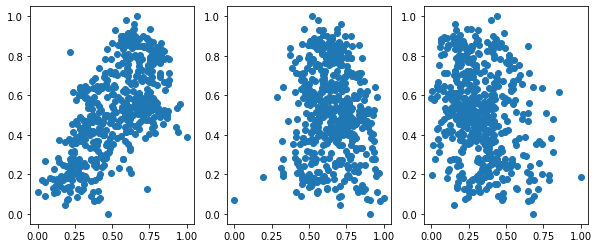

In [110]:
# Visualising other Numerical Variables

plt.figure(figsize=(10, 4))

plt.subplot(1,3,1)
plt.scatter(BoomBikesdf_new_train.atemp, BoomBikesdf_new_train.cnt)
plt.subplot(1,3,2)
plt.scatter(BoomBikesdf_new_train.humidity, BoomBikesdf_new_train.cnt)
plt.subplot(1,3,3)
plt.scatter(BoomBikesdf_new_train.windspeed, BoomBikesdf_new_train.cnt)

plt.show()

In [111]:
# Dividing into X and Y sets for the model building

x_train = BoomBikesdf_new_train
y_train = BoomBikesdf_new_train.pop('cnt')

In [112]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [113]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snow', True, 1),
 ('Mist+Cloudy', True, 1)]

In [114]:
# selecting the selected variable via RFE in x train data set

x_train_rfe = x_train[x_train.columns[rfe.support_]]

In [115]:
# checking which columns has been rejected

x_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [116]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
14,Mist+Cloudy,2.32
0,year,2.09
11,nov,1.83
9,jan,1.75


In [117]:
# Building a linear model

x_train_lm_1 = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,x_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        16:46:14   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3202      0.036      8.886      

In [118]:
# As humidity shows high VIF values hence we can drop it

x_train_new = x_train_rfe.drop(['humidity'], axis = 1)

In [119]:
# Checking VIF again after dropping humidity column

vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,year,2.07
10,nov,1.80
8,jan,1.66
9,july,1.59
13,Mist+Cloudy,1.56


In [120]:
# Building a linear model again after dropping humidity column

x_train_lm_2 = sm.add_constant(x_train_new)
lr_2 = sm.OLS(y_train,x_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        16:46:14   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2466      0.032      7.679      

In [121]:
# As summer shows high P value hence we can drop it

x_train_new = x_train_new.drop(['summer'], axis = 1)

In [122]:
# Checking VIF again after dropping summer column

vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,year,2.06
9,nov,1.80
7,jan,1.65
12,Mist+Cloudy,1.53
6,dec,1.46
8,july,1.36


In [123]:
# Building a linear model again after dropping summer column

x_train_lm_3 = sm.add_constant(x_train_new)
lr_3 = sm.OLS(y_train,x_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.08e-186
Time:                        16:46:15   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2893      0.025     11.427      

In [124]:
# As nov shows high P value hence we can drop it

x_train_new = x_train_new.drop(['nov'], axis = 1)

In [125]:
# Checking VIF again after dropping nov column

vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.36
0,year,2.06
5,winter,1.64
7,jan,1.64
11,Mist+Cloudy,1.53
8,july,1.36
6,dec,1.29
9,sep,1.20


In [126]:
# Building a linear model again after dropping nov column

x_train_lm_4 = sm.add_constant(x_train_new)
lr_4 = sm.OLS(y_train,x_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.02e-186
Time:                        16:46:16   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2769      0.025     11.074      

In [127]:
# As dec shows high P value hence we can drop it

x_train_new = x_train_new.drop(['dec'], axis = 1)

In [128]:
# Checking VIF again after dropping dec column

vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,year,2.06
6,jan,1.60
10,Mist+Cloudy,1.53
5,winter,1.40
7,july,1.36
8,sep,1.20
9,Light_snow,1.08


In [129]:
# Building a linear model again after dropping dec column

x_train_lm_5 = sm.add_constant(x_train_new)
lr_5 = sm.OLS(y_train,x_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.13e-186
Time:                        16:46:20   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2657      0.025     10.843      

In [130]:
# As jan shows high P value hence we can drop it

x_train_new = x_train_new.drop(['jan'], axis = 1)

In [131]:
# Checking VIF again after dropping jan column

vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,spring,1.65
9,Mist+Cloudy,1.51
5,winter,1.40
6,july,1.35
7,sep,1.20
8,Light_snow,1.08
1,holiday,1.04


In [132]:
# Building a linear model again after dropping jan column

x_train_lm_6 = sm.add_constant(x_train_new)
lr_6 = sm.OLS(y_train,x_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.16e-186
Time:                        16:46:24   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2519      0.024     10.530      

In [133]:
# Residual Analysis of the train data

y_train_pred = lr_6.predict(x_train_lm_6)

Text(0.5, 0, 'Errors')

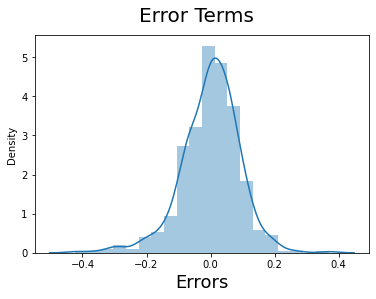

In [137]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

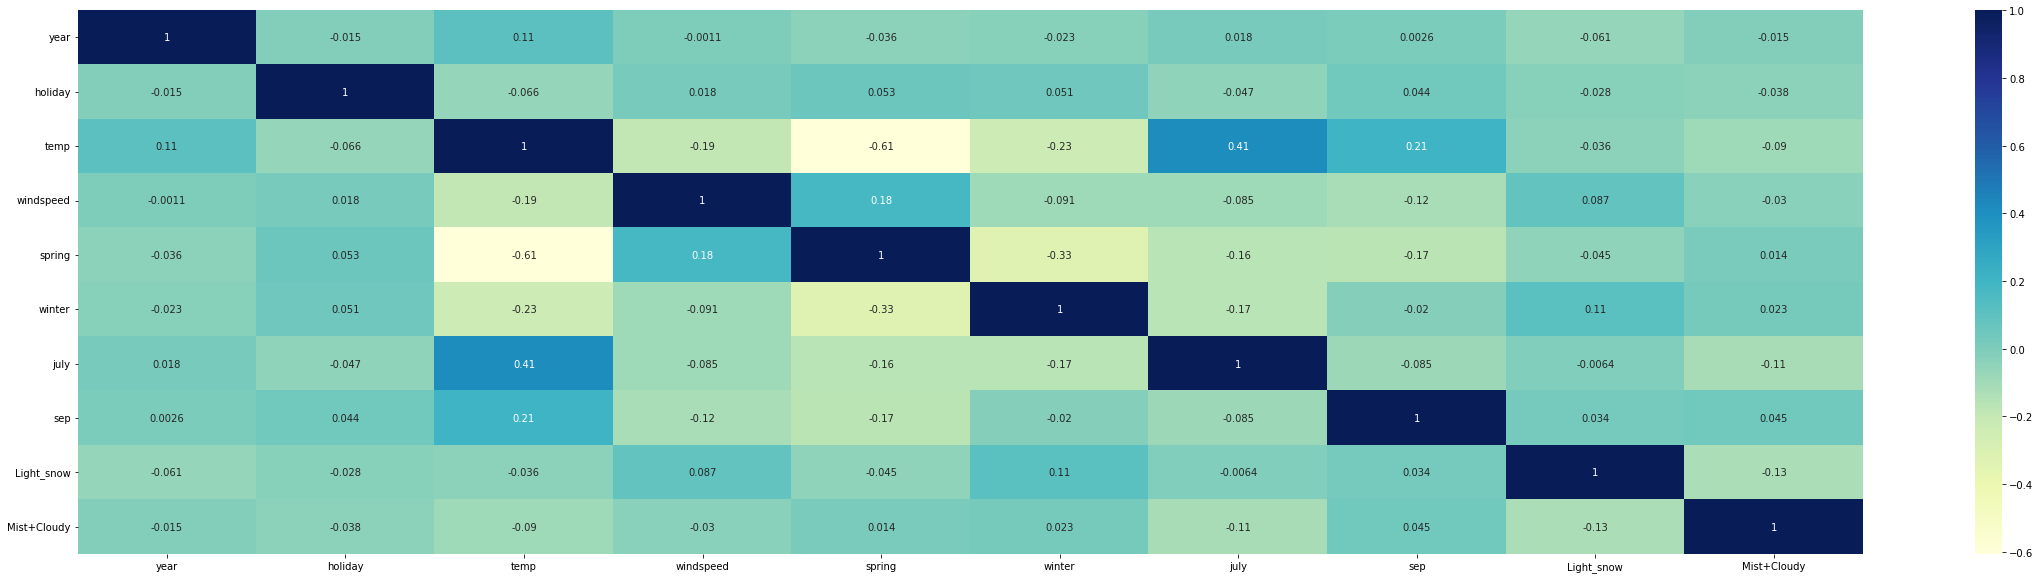

In [138]:
plt.figure(figsize=(40,10))
sns.heatmap(x_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [139]:
# Making Predictions Using the Final Model

# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
BoomBikesdf_new_test[num_vars] = scaler.transform(BoomBikesdf_new_test[num_vars])
BoomBikesdf_new_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [140]:
# Describing test data set

BoomBikesdf_new_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow,Mist+Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
# Dividing into X and Y sets for the model building

x_test = BoomBikesdf_new_test
y_test = BoomBikesdf_new_test.pop('cnt')

In [142]:
# Adding constant variable to test dataframe

x_train_lm_6 = sm.add_constant(x_test[x_train_new.columns])

In [143]:
y_pred = lr_6.predict(x_train_lm_6)

In [144]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.807

Text(0, 0.5, 'y_pred')

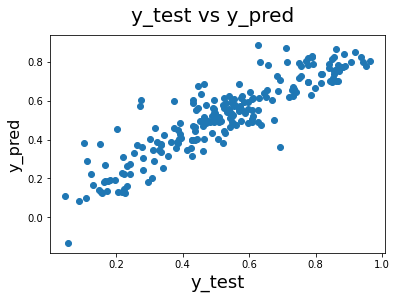

In [145]:
# Model Evaluation

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 


In [146]:
round(lr_6.params,4)

const          0.2519
year           0.2341
holiday       -0.0986
temp           0.4515
windspeed     -0.1398
spring        -0.1108
winter         0.0473
july          -0.0727
sep            0.0577
Light_snow    -0.2864
Mist+Cloudy   -0.0811
dtype: float64

In [67]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7774


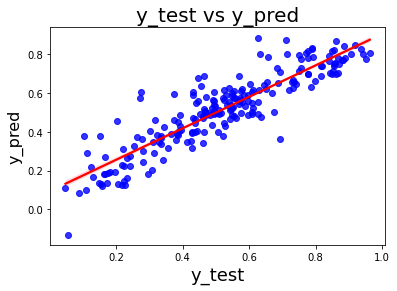

In [68]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()